<a href="https://colab.research.google.com/github/eldor-fozilov/data-science-contest/blob/main/full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Necessary Packages

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

## EDA

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science Contest/X_model.csv')
data.head()

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,1,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/Data Science Contest/Y_model.csv')

In [ ]:
labels.value_counts() / len(labels)

business
0           0.934604
1           0.065396
dtype: float64

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data Science Contest/X_exam.csv')

In [ ]:
submission_format = pd.read_csv('/content/drive/MyDrive/Data Science Contest/submission.csv')
submission_format.head()

,business_prob,popup,survey
0,0.61845,1,0
1,0.97296,1,1
2,0.78073,1,0
3,0.02992,0,0
4,0.25522,0,0


In [ ]:
data.gender.value_counts() / len(data)

2    0.500781
1    0.499219
Name: gender, dtype: float64

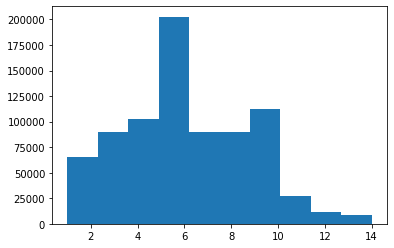

In [ ]:
plt.figure()
plt.hist(data.age_code)
plt.show()

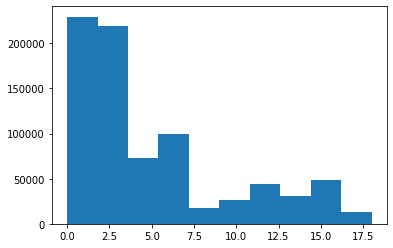

In [ ]:
plt.figure()
plt.hist(data.region_code)
plt.show()

In [ ]:
data.fillna(0, inplace = True)
data.head(7)

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,1,13,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,5,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
6,2,6,2,0.0,0.0,3.0,4.0,3.0,6.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_transformed = data.loc[:,['gender','age_code','region_code']]
data_transformed.head()

,gender,age_code,region_code
0,1,13,7
1,1,5,1
2,2,6,2
3,2,1,1
4,2,5,1


In [ ]:
for i in range(3):
  j = 238 * i + 3
  k = 1
  while j < 238*(i+1) + 3:
    weekly_info = np.sum(data.iloc[:,j:j+7], axis = 1) / 7
    if i == 0:
      data_transformed[f'c_week{k}'] = weekly_info
    elif i == 1:
      data_transformed[f's_week{k}'] = weekly_info
    else:
      data_transformed[f't_week{k}'] = weekly_info
    k += 1
    j += 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
data_transformed

,gender,age_code,region_code,c_week1,c_week2,c_week3,c_week4,c_week5,c_week6,c_week7,c_week8,c_week9,c_week10,c_week11,c_week12,c_week13,c_week14,c_week15,c_week16,c_week17,c_week18,c_week19,c_week20,c_week21,c_week22,c_week23,c_week24,c_week25,c_week26,c_week27,c_week28,c_week29,c_week30,c_week31,c_week32,c_week33,c_week34,s_week1,s_week2,s_week3,s_week4,s_week5,s_week6,s_week7,s_week8,s_week9,s_week10,s_week11,s_week12,s_week13,s_week14,s_week15,s_week16,s_week17,s_week18,s_week19,s_week20,s_week21,s_week22,s_week23,s_week24,s_week25,s_week26,s_week27,s_week28,s_week29,s_week30,s_week31,s_week32,s_week33,s_week34,t_week1,t_week2,t_week3,t_week4,t_week5,t_week6,t_week7,t_week8,t_week9,t_week10,t_week11,t_week12,t_week13,t_week14,t_week15,t_week16,t_week17,t_week18,t_week19,t_week20,t_week21,t_week22,t_week23,t_week24,t_week25,t_week26,t_week27,t_week28,t_week29,t_week30,t_week31,t_week32,t_week33,t_week34
0,1,13,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.285714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
1,1,5,1,0.142857,0.000000,0.142857,0.000000,0.142857,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.857143,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000,0.428571,0.000000,0.428571,0.428571,0.142857,0.571429,0.285714,0.142857,0.571429,0.000000,0.142857,0.142857,4.285714,0.000000,3.000000,0.000000,4.714286,0.000000,10.571429,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.142857,16.428571,0.000000,0.000000,1.428571,0.000000,0.000000,1.000000,0.000000,6.285714,0.000000,8.428571,9.142857,1.000000,4.428571,1.714286,10.571429,1.714286,0.000000,9.285714,10.714286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,6,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.714286,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,1.428571,0.000000,0.142857,0.000000,0.285714,0.285714,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.285714,187.571429,0.000000,33.000000,0.000000,58.000000,0.000000,0.000000,0.000000,235.571429,0.000000,9.000000,0.000000,20.714286,36.857143,16.285714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000